## Importación de librerías

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
df_houses = pd.read_csv('house_prices.csv')
df_houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Mostramos el tamaño de la tabla
df_houses.shape

(1460, 81)

In [4]:
df_houses.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_houses.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [6]:
df_houses.Alley.isna().sum()

1369

In [7]:
df_houses.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [8]:
df_houses.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Estudio del conjunto de datos

C:\Users\ninel\AppData\Local\Temp\ipykernel_14408\3937139858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_houses.corr()


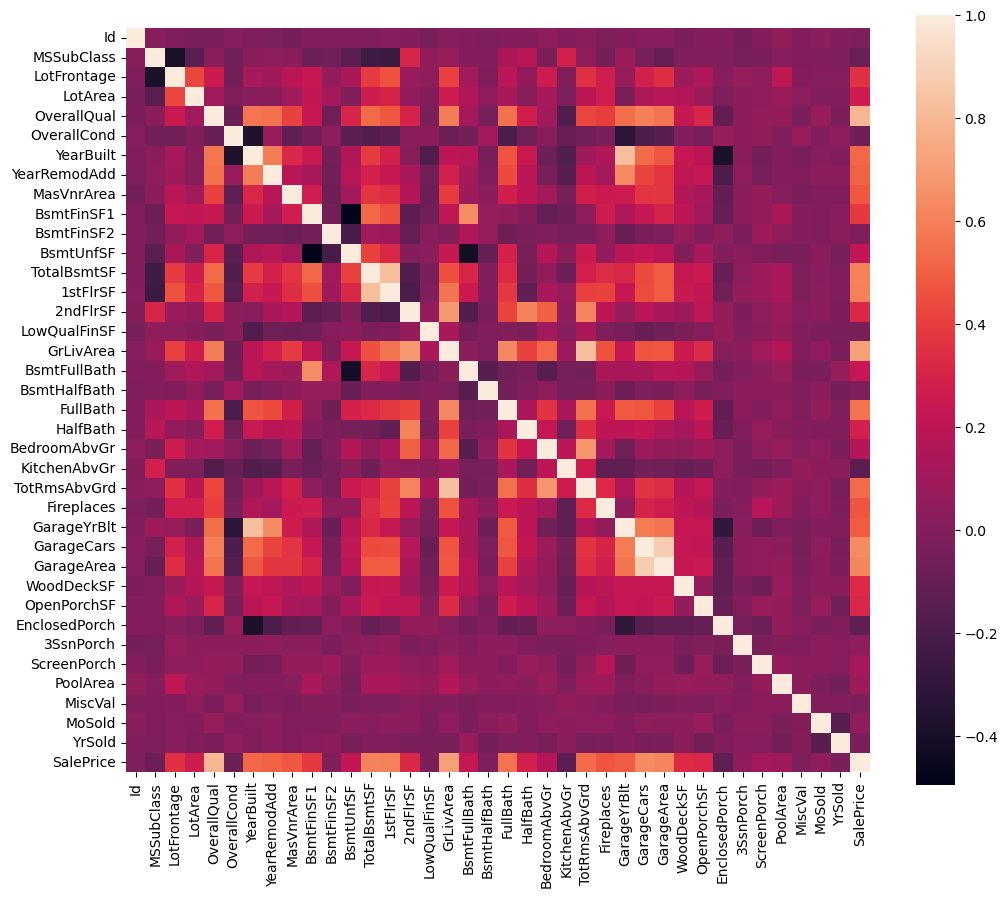

In [9]:
corr = df_houses.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, square=True)
plt.show()

In [10]:
# Seleccionamos los datos que mas influyen en el precio de venta de la vivienda
# OverallQual, GrLivArea, GarageCars, GarageArea, GrLivArea

# Seleccion de datos

In [57]:
x = df_houses[["OverallQual", "GarageCars", "GarageArea", "GrLivArea"]]
y = df_houses["SalePrice"]

# Division del conjunto de datos

In [68]:
# Conjunto de entrenamiento, conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

# Conjunto de desarollo, conjunto de validacion
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.18, random_state=1)

In [69]:
x_train.shape

(1017, 4)

In [70]:
x_test.shape

(219, 4)

In [71]:
x_val.shape

(224, 4)

## Creacion del modelo de regresion lineal

In [72]:
# Creacion del modelo
lr = LinearRegression()

# Ajustamos el modelo al conjunto de datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression()

## Prediccion del conjunto de datos de validacion


In [73]:
y_pred = lr.predict(x_val)

## Validacion de resultados

In [74]:
df_res = pd.DataFrame(columns=["OverallQual", "GarageCars", "GarageArea", "GrLivArea", "Valor Real", "Valor Predicho"])
df_res["OverallQual"] = x_val["OverallQual"]
df_res["GarageCars"] = x_val["GarageCars"]
df_res["GarageArea"] = x_val["GarageArea"]
df_res["GrLivArea"] = x_val["GrLivArea"]
df_res["Valor Real"] = y_val
df_res["Valor Predicho"] = y_pred
df_res["Diferencia"] = abs(df_res["Valor Predicho"] - df_res["Valor Real"])
df_res.head(10)

,OverallQual,GarageCars,GarageArea,GrLivArea,Valor Real,Valor Predicho,Diferencia
718,7,3,983,2418,341000,281741.153910,59258.846090
978,4,2,400,894,110000,96308.540849,13691.459151
472,6,2,525,1072,148000,163460.882691,15460.882691
669,4,1,252,1180,137500,88840.186208,48659.813792
825,10,3,1220,2084,385000,358197.687907,26802.312093
623,6,2,440,1512,168500,179288.536254,10788.536254
476,6,2,508,1493,208900,181167.387007,27732.612993
651,4,1,296,1510,108000,105002.729169,2997.270831
219,7,2,438,1248,167240,194881.294818,27641.294818
174,6,2,616,1651,184000,192368.468384,8368.468384


# Metricas

In [75]:
print("Raiz error cuadratico medio:", np.sqrt(mean_squared_error(y_val, y_pred)))
print("Coeficiente de determinacion:",  round(r2_score(y_val, y_pred),2))

Raiz error cuadratico medio: 38078.6149429474
Coeficiente de determinacion: 0.78


# Prediccion de datos futuros

In [76]:
y_pred = lr.predict(x_test)

In [77]:
print("Raiz error cuadtratico medio: ",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coeficiente de determinacion:",  round(r2_score(y_test, y_pred),2))

Raiz error cuadtratico medio:  36593.79467257479
Coeficiente de determinacion: 0.79
